# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

# imports modules for notebook

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import pickle
import numpy as np

# load original provided data set 

In [715]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'
with tf.device('/cpu:0'):
    with open(training_file, mode='rb') as f:
        train = pickle.load(f)
    with open(validation_file, mode='rb') as f:
        valid = pickle.load(f)
    with open(testing_file, mode='rb') as f:
        test = pickle.load(f)

    X_train, y_train = train['features'], train['labels']
    X_valid, y_valid = valid['features'], valid['labels']
    X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_valid = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_test))

n_total = len(y_train) + len(y_valid) + len(y_test)
train_ratio = round(n_train/n_total,2)
valid_ratio = round(n_valid/n_total,2)
test_ratio = round(n_test/n_total,2)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("training set: validation set: testing set =",train_ratio,":",valid_ratio,":",test_ratio)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
training set: validation set: testing set = 0.67 : 0.09 : 0.24


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Below is summary plots of the data set distribution

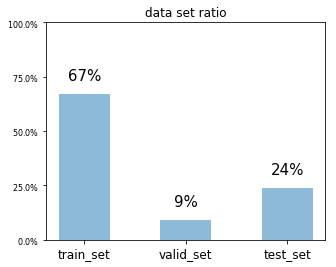

In [5]:
fig, ax = plt.subplots(figsize=(5, 4))

ax.bar([1,2,3], [train_ratio,valid_ratio,test_ratio],  align="center", width=0.5, alpha=0.5)
ax.set_title('data set ratio')
ax.set_xticks([1, 2, 3])
ax.set_xticklabels([r'train_set', r'valid_set', r'test_set'], fontsize=12)

yticks = [0, 0.25, 0.5, 0.75, 1]
ax.set_yticks(yticks)
ax.set_yticklabels([("$%.1f$" % (y*100) + "%") for y in yticks], fontsize=8); # use LaTeX formatted labels
for xvalue,ratio in zip([1,2,3],[train_ratio,valid_ratio,test_ratio]):
    ax.text(xvalue, ratio+0.05, '%.0d' % (ratio*100)+'%', ha='center', va= 'bottom',fontsize=15)

fig.savefig('report_images\data_ratio.jpg')

# now plot the label based distribution

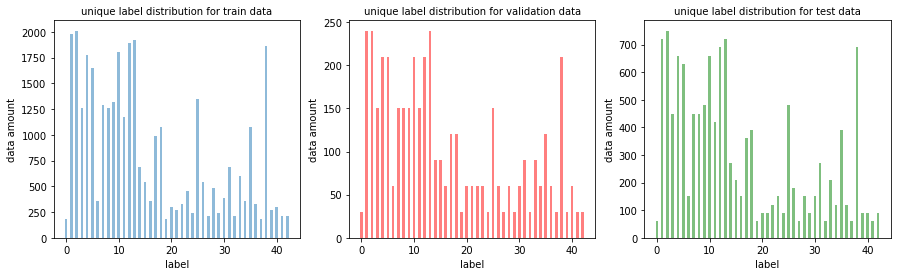

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

unique_labels = np.unique(y_test)
train_label_count = np.unique(y_train,return_counts=True)[1]
valid_label_count = np.unique(y_valid,return_counts=True)[1]
test_label_count = np.unique(y_test,return_counts=True)[1]

ax[0].bar( unique_labels, train_label_count,  align="center", width=0.5, alpha=0.5)
ax[0].set_title('unique label distribution for train data', fontsize = 10)
ax[0].set_xlabel('label')
ax[0].set_ylabel('data amount')

yticks = np.linspace(0,1500,num = 3)

ax[1].bar( unique_labels, valid_label_count,  align="center", width=0.5, alpha=0.5,color = 'r')
ax[1].set_title('unique label distribution for validation data', fontsize = 10 )
ax[1].set_xlabel('label')
ax[1].set_ylabel('data amount')


ax[2].bar( unique_labels, test_label_count,  align="center", width=0.5, alpha=0.5, color = 'green')
ax[2].set_title('unique label distribution for test data', fontsize = 10)
ax[2].set_xlabel('label')
ax[2].set_ylabel('data amount')

fig.savefig(r'report_images\unique_label_distribution.jpg')

# show examples of the label based data set pictures

(7, 7)


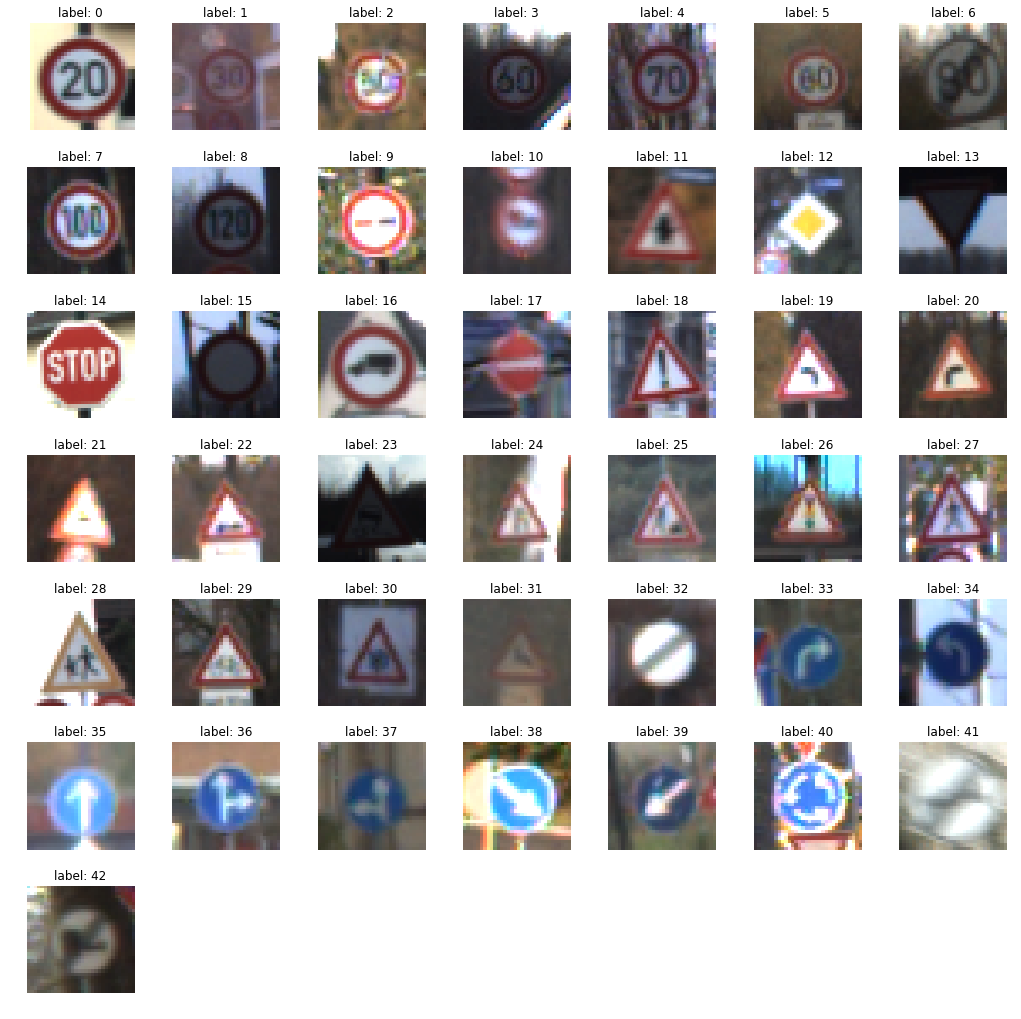

In [418]:
import imgaug as ia
from imgaug import augmenters as iaa
import random
brighter = iaa.Multiply((1.2, 1.3), per_channel=0.2)
fig, ax = plt.subplots(7, 7, figsize=(14, 14))
print (ax.shape)
for label in unique_labels:
    condition  = (np.average(X_train,axis = (1,2,3) )>50)&((np.average(X_train,axis = (1,2,3) )<150))
    index_array = np.array(np.where(y_train[condition] == label))
    np.random.shuffle(index_array)  
    index = index_array.squeeze()[0]
    image = X_train[condition][index].squeeze()
    if np.average(image)<100:
        image = brighter.augment_image(image)
    plot_index_1 = int((label)/7.)
    plot_index_2 = label - (int((label)/7.))*7
    ax[plot_index_1][plot_index_2].set_title('label: '+str(label),fontsize = 12)
    ax[plot_index_1][plot_index_2].imshow(seq.augment_image(image))
    ax[plot_index_1][plot_index_2].axis('off')
for label in range(len(unique_labels),49):
    plot_index_1 = int((label)/7.)
    plot_index_2 = label - (int((label)/7.))*7
    ax[plot_index_1][plot_index_2].axis('off')
    
fig.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)

fig.savefig(r'report_images\stopsign_examples.jpg')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

<br><br><br><br><br>
# 2.1 Image augmentation 1st attempt(heavy augmentation)
### This is the first attemp of my image augmentation(not used for final model)
Here I use image augmentation library, and define a function to randomly augment images using augnmentation techniques
The augmentation techniques include:
- Flip image left and right
- crop the image 
- apply Gaussian Blur to images
- Strengthen or weaken the contrast in each image
- Add gaussian noise
- make images brighter or darker
- Apply affine transformations to each image(Scale/zoom them, translate/move them, rotate them and shear them)

In [34]:
import imgaug as ia
from imgaug import augmenters as iaa


# Example batch of images.
# The array has shape (32, 64, 64, 3) and dtype uint8.
images = X_train[0:2]

seq = iaa.Sequential([
    iaa.Fliplr(0.5), # horizontal flips
    iaa.Crop(percent=(0, 0.1)), # random crops
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    iaa.Sometimes(0.5,
        iaa.GaussianBlur(sigma=(0, 0.5))
    ),
    # Strengthen or weaken the contrast in each image.
    iaa.ContrastNormalization((0.75, 1.5)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    iaa.Multiply((0.8, 1.2), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-25, 25),
        shear=(-8, 8)
    )
], random_order=True) # apply augmenters in random order
images_aug = []


In the 1st attemp, I use above function to randomly augment images<br>
The fllowing clode applies crops and affine transformations to images, flips some of the images horizontally, adds a bit of noise and blur and also changes the contrast as well as brightness.<br>
Through this process we now have 10 times more images for our traning set, which is a huge addition
>**Note: this data set is not used for final model, because after testing, I found that I have added too much noise to the training set, which leads to degregation of of model performance**

In [51]:
X_train_aug = X_train
y_train_aug = y_train
for num in range(0,10):
    print ('process {}/10'.format(num+1))
    X_train_aug = np.concatenate((X_train_aug, seq.augment_images(X_train)), axis=0)
    y_train_aug = np.concatenate((y_train_aug, y_train), axis=0)

process 1/10
process 2/10
process 3/10
process 4/10
process 5/10
process 6/10
process 7/10
process 8/10
process 9/10
process 10/10


**Now save the augmentation image in to a pickle file for future use. file name is train_aug.p**

In [56]:
train_aug = {}
train_aug['features'], train_aug['labels'] = X_train_aug, y_train_aug

with open('train_aug.p', 'wb') as handle:
    pickle.dump(train_aug, handle, protocol=pickle.HIGHEST_PROTOCOL)

examples of 1st attemp augmentation images

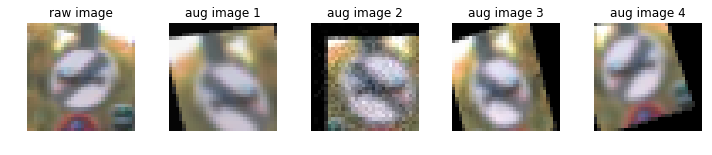

In [427]:
X_train = X_train_aug
y_train = y_train_aug
fig, ax = plt.subplots(1, 5, figsize=(10, 3))
ax[0].imshow(X_train[100])
ax[0].set_title('raw image')
ax[0].axis('off')
ax[1].imshow(X_train_aug[100+34799],cmap = 'gray')
ax[1].set_title('aug image 1')
ax[1].axis('off')
ax[2].imshow(X_train_aug[100+34799*2],cmap = 'gray')
ax[2].set_title('aug image 2')
ax[2].axis('off')
ax[3].imshow(X_train_aug[100+34799*3],cmap = 'gray')
ax[3].set_title('aug image 3')
ax[3].axis('off')
ax[4].imshow(X_train_aug[100+34799*4],cmap = 'gray')
ax[4].set_title('aug image 4')
ax[4].axis('off')
fig.tight_layout()
fig.savefig(r'report_images\augmentation_1st_samples.jpg')


<br><br><br><br><br>
# 2.2 Image augmentation 2nd attempt(light augmentation)
### This is the second attemp of my image augmentation(This augmentation data set is used for final model)
From the 1st attemp I found that I should not add too much noise on images. The reason is that the augmented images may be impossible for machine or human beings to interpret after heavy agumentation.
So in the 2nd try of augmentation, I use less heavy augmentation techniques to get a bigger traning set. This ends up getting better perfomance in my final model.
Below is the list of augmentations.

- make images brighter or darker
- Apply affine transformations to each image(Scale/zoom them, translate/move them, rotate them and shear them)

In [56]:
import imgaug as ia
from imgaug import augmenters as iaa



seq = iaa.Sequential([
    iaa.Multiply((0.8, 1.2), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
        rotate=(-25, 25),
        shear=(-4, 4)
    )
], random_order=False) # apply augmenters in random order



**Now process original training images and save to a local file train_aug_adjust.p**<br>
The new training set is 5 times larger than the original training set.

In [67]:
X_train_aug = X_train
y_train_aug = y_train
for num in range(0,5):
    print ('process {}/5'.format(num+1))
    X_train_aug = np.concatenate((X_train_aug, seq.augment_images(X_train)), axis=0)
    y_train_aug = np.concatenate((y_train_aug, y_train), axis=0)

process 1/5
process 2/5
process 3/5
process 4/5
process 5/5


In [68]:
train_aug = {}
train_aug['features'], train_aug['labels'] = X_train_aug, y_train_aug

with open('train_aug_adjust.p', 'wb') as handle:
    pickle.dump(train_aug, handle, protocol=pickle.HIGHEST_PROTOCOL)

examples of 2st attemp augmentation images. We can see that it is not heavy augmentation like the 1st attempt

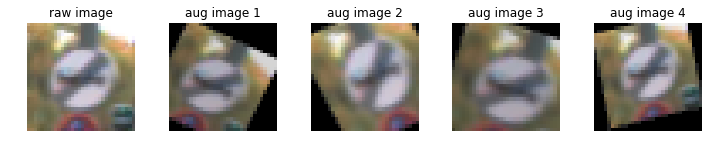

In [425]:
X_train = X_train_aug
y_train = y_train_aug
fig, ax = plt.subplots(1, 5, figsize=(10, 3))
ax[0].imshow(X_train[100])
ax[0].set_title('raw image')
ax[0].axis('off')
ax[1].imshow(X_train_aug[100+34799],cmap = 'gray')
ax[1].set_title('aug image 1')
ax[1].axis('off')
ax[2].imshow(X_train_aug[100+34799*2],cmap = 'gray')
ax[2].set_title('aug image 2')
ax[2].axis('off')
ax[3].imshow(X_train_aug[100+34799*3],cmap = 'gray')
ax[3].set_title('aug image 3')
ax[3].axis('off')
ax[4].imshow(X_train_aug[100+34799*4],cmap = 'gray')
ax[4].set_title('aug image 4')
ax[4].axis('off')
fig.tight_layout()
fig.savefig(r'report_images\augmentation_2nd_samples.jpg')


**Here is the visulization of the augmented data set**

In [495]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
# TODO: Number of training examples
n_train_aug = len(y_train_aug)

# TODO: Number of validation examples
n_valid = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_test))

n_total = len(y_train_aug) + len(y_valid) + len(y_test)
train_aug_ratio = round(n_train_aug/n_total,2)
valid_ratio = round(n_valid/n_total,2)
test_ratio = round(n_test/n_total,2)

print("Number of augmented training examples =", n_train_aug)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("aug training set: validation set: testing set =",train_ratio,":",valid_ratio,":",test_ratio)

Number of augmented training examples = 208794
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
aug training set: validation set: testing set = 0.92 : 0.02 : 0.06


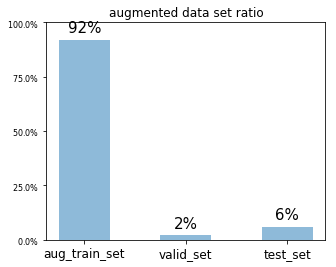

In [500]:
fig, ax = plt.subplots(figsize=(5, 4))

ax.bar([1,2,3], [train_aug_ratio,valid_ratio,test_ratio],  align="center", width=0.5, alpha=0.5)
ax.set_title('augmented data set ratio')
ax.set_xticks([1, 2, 3])
ax.set_xticklabels([r'aug_train_set', r'valid_set', r'test_set'], fontsize=12)

yticks = [0, 0.25, 0.5, 0.75, 1]
ax.set_yticks(yticks)
ax.set_yticklabels([("$%.1f$" % (y*100) + "%") for y in yticks], fontsize=8); # use LaTeX formatted labels
for xvalue,ratio in zip([1,2,3],[train_ratio,valid_ratio,test_ratio]):
    ax.text(xvalue, ratio+0.02, '%.0d' % (ratio*100)+'%', ha='center', va= 'bottom',fontsize=15)

fig.savefig('report_images\data_ratio_augment.jpg')

# 2.3 image normalize and grayscale
- apply normalization for images. Normalized inputs are easier for model parameters to get small and reasonable mean and variance
- apply grayscale to images. This is in order to give less input for our model to train on. 

In [3]:
#training_file_aug = 'train_aug.p'
training_file_aug = 'train_aug_adjust.p'
validation_file= 'valid.p'
testing_file = 'test.p'
with tf.device('/cpu:0'):
    with open(training_file_aug, mode='rb') as f:
        train_aug = pickle.load(f)
    with open(validation_file, mode='rb') as f:
        valid = pickle.load(f)
    with open(testing_file, mode='rb') as f:
        test = pickle.load(f)

    X_train_aug, y_train_aug = train_aug['features'], train_aug['labels']
    X_valid, y_valid = valid['features'], valid['labels']
    X_test, y_test = test['features'], test['labels']

**Below are functions of processing images**

In [4]:
import cv2
def grayscale(imgs):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    """
    grayimgs = []
    for imgnum in range(imgs.shape[0]):
        grayimg = cv2.cvtColor(imgs[imgnum], cv2.COLOR_RGB2GRAY)     
        grayimgs.append(grayimg)
    return np.array(grayimgs)
def normalize(imgs):
    """
    Normalize image by (pixel - 128)/ 128
    """
    norm_imgs = (imgs-128.)/128.
    return norm_imgs
def changedim(imgs):
    """
    change imgs dimensions to feed in convnet
    """   
    newimgs = np.expand_dims(imgs, axis=3)
    return newimgs

**Here I plot example of normalized and grayscale images**

raw images shape is : (208794, 32, 32, 3)
gray images shape is : (208794, 32, 32)
norm images shape is : (208794, 32, 32)


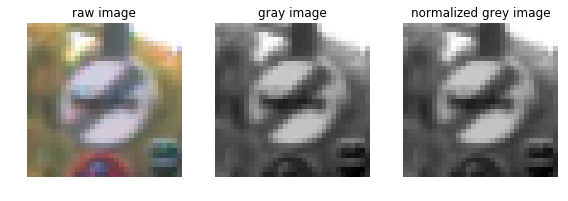

In [5]:
with tf.device('/cpu:0'):
    X_train = X_train_aug
    y_train = y_train_aug

    X_train_gray = grayscale(X_train)
    X_train_norm = normalize(X_train_gray)

    X_valid_gray = grayscale(X_valid)
    X_valid_norm = normalize(X_valid_gray)

    X_test_gray = grayscale(X_test)
    X_test_norm = normalize(X_test_gray )
print ('raw images shape is : {}'.format(X_train.shape))
print ('gray images shape is : {}'.format(X_train_gray.shape))
print ('norm images shape is : {}'.format(X_train_norm.shape))

fig, ax = plt.subplots(1, 3, figsize=(8, 3))
ax[0].imshow(X_train[100])
ax[0].set_title('raw image')
ax[0].axis('off')
ax[1].imshow(X_train_gray[100],cmap = 'gray')
ax[1].set_title('gray image')
ax[1].axis('off')
ax[2].imshow(X_train_norm[100],cmap = 'gray')
ax[2].axis('off')
ax[2].set_title('normalized grey image')
fig.tight_layout()
fig.savefig(r'report_images\stopsign_gray_and_norm.jpg')

**Here I show the input shape to be fed into Convnet**

In [6]:
with tf.device('/cpu:0'):
    X_train_input = changedim(X_train_norm)
    X_valid_input = changedim(X_valid_norm)
    X_test_input = changedim(X_test_norm)
print ('final input image to Convnet shape is : {}'.format(X_train_input.shape))

final input image to Convnet shape is : (208794, 32, 32, 1)


** data are shuffled before fed into Convnet**

In [7]:
with tf.device('/cpu:0'):
    from sklearn.utils import shuffle
    X_train_input, y_train = shuffle(X_train_input, y_train)

# Step 3 Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

# 3.1 model defining

Below is a function for batch norm layer to be tried on my model

In [8]:
from tensorflow.python.ops import control_flow_ops

def batch_norm(x, n_out, phase_train, scope='bn'):
    with tf.variable_scope(scope):
        beta = tf.Variable(tf.constant(0.0, shape=[n_out]),
                                     name='beta', trainable=True)
        gamma = tf.Variable(tf.constant(1.0, shape=[n_out]),
                                      name='gamma', trainable=True)
        batch_mean, batch_var = tf.nn.moments(x, [0], name='moments')
        ema = tf.train.ExponentialMovingAverage(decay=0.5)

        def mean_var_with_update():
            ema_apply_op = ema.apply([batch_mean, batch_var])
            with tf.control_dependencies([ema_apply_op]):
                return tf.identity(batch_mean), tf.identity(batch_var)

        mean, var = tf.cond(phase_train,
                            mean_var_with_update,
                            lambda: (ema.average(batch_mean), ema.average(batch_var)))
        normed = tf.nn.batch_normalization(x, mean, var, beta, gamma, 1e-3)
    return normed

Below is an inception layer function to be tried on my model<br>
Here is what a inception layer looks like:
<img src="report_images/inception_layer.png">

In [9]:
def inception2d(x, in_channels, filter_count,mu,sigma):
    # bias dimension = 3*filter_count and then the extra in_channels for the avg pooling
   # bias = tf.Variable(tf.truncated_normal([3*filter_count + in_channels], mu, sigma)),
    bias  = tf.Variable(tf.zeros(3*filter_count + in_channels))

    # 1x1
    one_filter = tf.Variable(tf.truncated_normal([1, 1, in_channels, filter_count], mu, sigma))
    one_by_one = tf.nn.conv2d(x, one_filter, strides=[1, 1, 1, 1], padding='SAME')

    # 3x3
    three_filter = tf.Variable(tf.truncated_normal([3, 3, in_channels, filter_count], mu, sigma))
    three_by_three = tf.nn.conv2d(x, three_filter, strides=[1, 1, 1, 1], padding='SAME')

    # 5x5
    five_filter = tf.Variable(tf.truncated_normal([5, 5, in_channels, filter_count], mu, sigma))
    five_by_five = tf.nn.conv2d(x, five_filter, strides=[1, 1, 1, 1], padding='SAME')

    # avg pooling
    pooling = tf.nn.avg_pool(x, ksize=[1, 3, 3, 1], strides=[1, 1, 1, 1], padding='SAME')

    x = tf.concat([one_by_one, three_by_three, five_by_five, pooling], axis=3)  # Concat in the 4th dim to stack
    x = tf.nn.bias_add(x, bias)
    output_channel = 3*filter_count + in_channels
    return tf.nn.relu(x),output_channel

**Here is the network of my training layers.<br>**
Basically what I use is the original LeNet achitecture, plus an incetion layer in the middle, which provides better performance and better converging speed.<br>
<img src="report_images/Lenet.png">

In [20]:
from tensorflow.contrib.layers import flatten

def LeNet(x,dropprob,batchnorm,is_training,cons_soft,incept = 0):    

    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_w = tf.Variable(tf.truncated_normal(shape = (5,5,1,6),mean = mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.add(tf.nn.conv2d(x,conv1_w,strides = [1,1,1,1],padding = 'VALID'),conv1_b)

    if batchnorm ==1:
        conv1  = batch_norm(conv1, 6, is_training)
    #  Activation.
    conv1_act = tf.nn.relu(conv1)

    #  Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1_pool = tf.nn.max_pool(conv1_act,ksize=(1,2,2,1),strides= (1,2,2,1),padding = 'VALID')



    #  Layer 2: Convolutional. Output = 10x10x16.
    conv2_w = tf.Variable(tf.truncated_normal(shape = (5,5,6,16),mean = mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.add(tf.nn.conv2d(conv1_pool,conv2_w,strides = [1,1,1,1],padding = 'VALID'),conv2_b)

    if batchnorm ==1:
        conv2  = batch_norm(conv2, 16, is_training)
    #  Activation.
    conv2_act = tf.nn.relu(conv2)


    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2_pool = tf.nn.max_pool(conv2_act,ksize=(1,2,2,1),strides= (1,2,2,1),padding = 'VALID')


    if incept == 1:
        #inception
        conv2_pool,output_channel = inception2d(conv2_pool, 16, 5,mu,sigma)
        fc0 = flatten(conv2_pool)

        fc1_w = tf.Variable(tf.truncated_normal(shape = (output_channel*5*5,120),mean = mu, stddev=sigma))
        fc1_b = tf.Variable(tf.zeros(120))
        fc1 = tf.add(tf.matmul(fc0,fc1_w),fc1_b)

    if incept != 1:
        #  Flatten. Input = 5x5x16. Output = 400.
        fc0 = flatten(conv2_pool)
        # Layer 3: Fully Connected. Input = 400. Output = 120.
        fc1_w = tf.Variable(tf.truncated_normal(shape = (400,120),mean = mu, stddev=sigma))
        fc1_b = tf.Variable(tf.zeros(120))
        fc1 = tf.add(tf.matmul(fc0,fc1_w),fc1_b)

    if batchnorm ==1:
        fc1 = batch_norm(fc1, 120, is_training)  

    #  Activation.
    fc1_act = tf.nn.relu(fc1)


    # Dropout
    fc1_act = tf.nn.dropout(fc1_act,keep_prob= dropprob)
   

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_w = tf.Variable(tf.truncated_normal(shape = (120,84),mean = mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.add(tf.matmul(fc1_act,fc2_w),fc2_b)

    if batchnorm ==1:
        fc2  = batch_norm(fc2, 84, is_training)
    # Activation.
    fc2_act = tf.nn.relu(fc2)


    # Dropout

    fc2_act = tf.nn.dropout(fc2_act, keep_prob= dropprob)

    
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_w = tf.Variable(tf.truncated_normal(shape = (84,43),mean = mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.add(tf.matmul(fc2_act,fc3_w),fc3_b)
    regularizers = tf.nn.l2_loss(conv1_w)
    for weights in [conv2_w,fc1_w,fc2_w,fc3_w]:
        regularizers += tf.nn.l2_loss(weights)
    return logits,regularizers

#### The training function is defined here, which provides bunch of parameters to used

In [11]:
import datetime
def train_model(num = 0, test = 0,print_info = 1,incept = 0, rate = 0.001, EPOCHS = 20, BATCH_SIZE = 64,regu_beta = 0,dropprob = 1,cons_soft = 0, batchnorm = 0,ratedecay = 0,X_train_input = X_train_input,y_train = y_train,X_valid_input = X_valid_input, y_valid = y_valid):

#####Above are hyper parameters
    config = tf.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 0.6

    x = tf.placeholder(tf.float32, (None, 32, 32, 1))
    y = tf.placeholder(tf.int32, (None))

    dropprob_holder = tf.placeholder(tf.float32,(None))
    rate_holder = tf.placeholder(tf.float32,(None))
    cons_soft_holder = tf.placeholder(tf.float32,(None))

    one_hot_y = tf.one_hot(y, 43)
    is_training = tf.placeholder(tf.bool, shape=())

    tf.logging.set_verbosity(tf.logging.INFO)

    logits,regularizers = LeNet(x,dropprob = dropprob_holder,batchnorm = batchnorm,is_training = is_training,cons_soft = cons_soft_holder,incept = incept)
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)

    regu_term = regularizers * regu_beta
    loss_operation = tf.reduce_mean(cross_entropy + regu_term)
    #optimizer = tf.train.AdamOptimizer(learning_rate = rate_holder)
    optimizer = tf.train.MomentumOptimizer(rate_holder,0.9)
    training_operation = optimizer.minimize(loss_operation)
    # don't use dropout for test and valid set

    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    saver = tf.train.Saver()

    def evaluate(X_data, y_data, rate):
        num_examples = len(X_data)
        total_accuracy = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
            accuracy = sess.run(accuracy_operation, feed_dict={cons_soft_holder: 0, x: batch_x, y: batch_y,dropprob_holder: 1.0,is_training: False,rate_holder:rate})
            total_accuracy += (accuracy * len(batch_x))
        return total_accuracy / num_examples
    def evaluate_loss(X_data, y_data, rate):
        num_examples = len(X_data)
        total_loss = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
            loss = sess.run(loss_operation, feed_dict={cons_soft_holder: 0, x: batch_x, y: batch_y,dropprob_holder: 1.0,is_training: False,rate_holder:rate})
            total_loss += (loss * len(batch_x))
        return total_loss / num_examples
    if test ==0:
        with tf.Session(config=config) as sess:
            sess.run(tf.global_variables_initializer())
            num_examples = len(X_train_input)

            print("Training...")
            print()

            train_accuracies = []
            train_accuracy =  0
            validation_accuracies = []
            loss_list = []
            starttime =  datetime.datetime.now()
            for i in range(EPOCHS):

                if ratedecay != 0:
                    #rate = rate/(ratedecay*EPOCHS+1)
                    rate = rate*ratedecay
                if rate<0.001:
                    n_rate = 0.001
                else:
                    n_rate = rate
                if train_accuracy<0.97 and rate<0.01:
                    n_rate = 0.01
                elif train_accuracy>0.97 and train_accuracy<0.98 and rate<0.004:
                    n_rate = 0.005   
                elif train_accuracy>0.98 and train_accuracy<0.983 and rate<0.002:
                    n_rate = 0.003
                elif train_accuracy>0.983 and train_accuracy<0.985 and rate<0.0012:
                    n_rate = 0.0015
                elif train_accuracy>0.985 and train_accuracy<0.987 and rate<0.0008:
                    n_rate = 0.001


                X_train_input, y_train = shuffle(X_train_input, y_train)
                for offset in range(0, num_examples, BATCH_SIZE):
                    end = offset + BATCH_SIZE
                    batch_x, batch_y = X_train_input[offset:end], y_train[offset:end]
                    sess.run(training_operation,feed_dict={cons_soft_holder: cons_soft, x: batch_x, y: batch_y,dropprob_holder: float(dropprob),is_training:True,rate_holder:n_rate})
                train_accuracy = evaluate(X_train_input, y_train,n_rate)    
                validation_accuracy = evaluate(X_valid_input, y_valid,n_rate)
                train_accuracies.append(train_accuracy)
                validation_accuracies.append(validation_accuracy)
                loss = evaluate_loss(X_train_input, y_train, n_rate)
                loss_list.append(loss)
                if  print_info == 1:
                    print("Loss at EPOCH{} = {:.5f}".format(i+1, loss))
                    print("Training Accuracy = {:.3f}".format(train_accuracy))
                    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
                    currenttime =  datetime.datetime.now()
                    timediff = (currenttime - starttime).seconds
                    timeleft = float(EPOCHS - i -1)/float(i+1)*timediff
                    print('estimate time left: {:.1f} seconds'.format(timeleft))
                    print('current learning rate:{:.3f}'.format(n_rate))
                elif (i+1)%5 == 0:
                    currenttime =  datetime.datetime.now()
                    timediff = (currenttime - starttime).seconds
                    timeleft = float(EPOCHS - i -1)/float(i+1)*timediff
                    print('training process {}/EPOCHS'.format(i+1))
                    print('estimate time left: {:.1f} seconds'.format(timeleft))
                    print('current learning rate:{:.3f}'.format(n_rate))
                #if train_accuracy>0.98 and validation_accuracy>0.98:
                    #break
            #saver.save(sess, './lenet'+str(num))
            #print("Model saved")
            return train_accuracies,validation_accuracies,loss_list

#### This is a function to draw the training result.

In [12]:
def draw_acc(train_accuracies,validation_accuracies,loss_list,EPOCHS,title_1,title_2):
    fig,ax = plt.subplots(1,2,figsize = [22,7])
    x_values =range(1,EPOCHS+1)
    ax[0].plot(x_values, train_accuracies,label = 'train accuracy' ,marker = 'o')
    ax[0].plot(x_values, validation_accuracies,label = 'validation accuracy', marker = 'o')
    for num in range(0,EPOCHS,1):
        ax[0].text(x_values[num],train_accuracies[num] - 0.02,str(round(train_accuracies[num],2)))
        ax[0].text(x_values[num],validation_accuracies[num] - 0.02,str(round(validation_accuracies[num],2)))
    ax[0].set_yticks(np.arange(0.5,1.01,0.1))
    ax[0].set_xticks(x_values)
    ax[0].set_ylabel('accuracy performance')
    ax[0].set_title(title_1)
    ax[0].legend() 

    ax[1].plot(x_values, loss_list,label = 'loss' ,marker = 'o')
    for num in range(0,EPOCHS,1):
        ax[1].text(x_values[num],loss_list[num] + 0.02,str(round(loss_list[num],2)))
    ax[1].set_yticks(np.arange(0.0,1.05,0.2))
    ax[1].set_xticks(x_values)
    ax[1].set_xlabel('EPOCH')
    ax[1].set_ylabel('loss')
    ax[1].set_title(title_2)
    ax[1].legend()
    return fig

**Here I define an empty pandas data frame to store my training result into a csv file**

In [13]:
def empty_train_result():
    train_result = pd.DataFrame(columns = ['dropprob','num','rate','ratedecay','regu_beta','cons_soft','EPOCH','BATCH_SIZE','train_acc','valid_acc','loss','layer_size','CNN_type','final_trainacc','final_validacc'])
    return train_result

# 3.2 Model development
*Note: For below sections, I use basic training set from 3.2.1 to 3.2.6 and use augmentation training set after 3.2.7! *
## 3.2.1 Baseline training
I start with a baseline training with final training accuracy 0.99 and final validation accuracy 0.92.<br>
For this baseline training I use:
- batchsize : 64
- learningrate: 0.001
- optimizer: Adam
- EPOCH: 20
- layers: original Lenet
- regularizations: no<br>
<br>
I have deleted the cell but the result is show below:<br>
**problem 1: seems like the batch size too small affect the stability**<br>
**problem 2: learning rate and other hyper parameters can be tuned to be better***<br>
**problem 3: This is clearly overfitting!**<br>
So What I do is to do a lot of experiments on regularization techniques, and hyperparameters tuning<br>
<img src="report_images/baseline.png">

# Shuffle data

In [18]:
with tf.device('/cpu:0'):
    from sklearn.utils import shuffle
    X_train_input, y_train = shuffle(X_train_input, y_train)

## 3.2.2 Dropout keepprob experiment

For this experiment , I add dropout technique to the two FC layers of Lenet, and try different keepprob value from 0.3 to 1.0, to see the accuracy and loss performance.<br>

I Save the parameters I use into a csv file, and save plots into a pdf file in 'hyper_para_testing\dropout\dropout_test.pdf'<br>
Through all the test result, I found out that dropprob 0.5 has the best performanc, as shown below.<br>

Through dropout keepprob 0.5 I increase the validation accuracy performance from 0.94 to 0.96
<img src="report_images/dropout_sample.png">


In [62]:
train_result = empty_train_result()
import itertools
pp = PdfPages(r'hyper_para_testing\dropout\dropout_test_1.pdf')

num = 0
for dropprob in [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    num+=1
    print ('traininig progress {}/{}'.format(num,8))

    train_acc,valid_acc,loss = train_model(print_info = 0, rate = 0.001, EPOCHS = 20, BATCH_SIZE = 128,dropprob = dropprob)
    train_result = train_result.append(pd.DataFrame(data = np.array([[0.001,20,64,0,0,0,5,'dropout_prob = {}'.format(dropprob),'LENET',train_acc[-1],valid_acc[-1]]]),columns = train_result.columns ))
    train_result.iloc[-1]['train_acc']=train_acc
    train_result.iloc[-1]['valid_acc']=valid_acc
    train_result.iloc[-1]['loss']=loss
    fig = draw_acc(train_acc,valid_acc,loss,20,'dropout prob {} accuracy'.format(dropprob),'dropout prob {} loss'.format(dropprob))
    pp.savefig(fig)
    plt.close(fig)
pp.close()
train_result.to_csv(r"hyper_para_testing\dropout\train_result_dropout_1.csv",float_format = '%.4f', index = False)

traininig progress 1/8
Training...

traininig progress 2/8
Training...

traininig progress 3/8
Training...

traininig progress 4/8
Training...

traininig progress 5/8
Training...

traininig progress 6/8
Training...

traininig progress 7/8
Training...

traininig progress 8/8
Training...



## 3.2.3 L2 Regularization test

For this experiment , I combine L2 norm with dropout technique to see what happends to the performance.<br>
I multiply 0.001 to the L2 term and add it to the loss function
I Save the parameters I use into a csv file, and save plots into a pdf file in 'hyper_para_testing\dropout_and_L2_norm\dropout_and_L2norm.pdf'<br><br>
**Through the test result, I found out that L2 norm does not increase my performance with already having dropout, as shown below.**<br>
Therefore I choose not to use L2 norm.
<img src="report_images/L2_norm_sample.png">

In [47]:
train_result = empty_train_result()
rate = 0.001   
EPOCHS = 20
BATCH_SIZE = 128
pp = PdfPages(r'hyper_para_testing\dropout_and_L2_norm\dropout_and_L2norm.pdf')
regu_beta = 0.001
dropprob = 0.5
train_acc,valid_acc,loss= train_model(print_info = 0, rate = rate, EPOCHS = EPOCHS, BATCH_SIZE = BATCH_SIZE,dropprob = dropprob, regu_beta =regu_beta)

train_result = train_result.append(pd.DataFrame(data = np.array([[rate,20,BATCH_SIZE,0,0,0,5,'l2_norm beta = {}, dropout prob = {}'.format(regu_beta,dropprob),'LENET',train_acc[-1],valid_acc[-1]]]),columns = train_result.columns ))
train_result.iloc[-1]['train_acc']=train_acc
train_result.iloc[-1]['valid_acc']=valid_acc
train_result.iloc[-1]['loss']=loss
title_1 = 'accuracy: l2_norm beta = {}, dropout prob = {}'.format(regu_beta,dropprob)
title_2 = 'loss: l2_norm beta = {}, dropout prob = {}'.format(regu_beta,dropprob)
fig = draw_acc(train_acc,valid_acc,loss,20,title_1,title_2)
pp.savefig(fig)
plt.close(fig)
pp.close()
train_result.to_csv( r"hyper_para_testing\dropout_and_L2_norm\dropout_and_L2_norm.csv",float_format = '%.4f', index = False)


Training...



 ## 3.2.4 batch norm experiment
 I've heard that batch norm can increase model performance, and having slight regularization effect on models.<br>
 Here I add batch norm layers and try it with/without dropout to see what heppens.
 You can find the whole results from :'hyper_para_testing\batchnorm\batchnorm.pdf'
 
 Below is the result of batch norm combined with dropout. **It seems that it hurts the performance somehow. I assume normally it won't hurt model performance, here it maybe because I already normalize the input, so it does not make much contribution to my model.**
<br>
 In the later experiment, I did not use batch norm.
 <img src="report_images/batchnorm_sample.PNG">

In [ ]:
train_result = empty_train_result()
import itertools
rate = 0.001   
EPOCHS = 20
BATCH_SIZE = 128
pp = PdfPages(r'hyper_para_testing\batchnorm\batchnorm.pdf')

num = 0
for para in itertools.product([0.5,1],[1,0]):
    dropprob,batchnorm = para
    num+=1
    print('training:{}/4'.format(num))
    train_acc,valid_acc,loss= train_model(print_info = 0, rate = rate, EPOCHS = EPOCHS, BATCH_SIZE = BATCH_SIZE,dropprob = dropprob, batchnorm = batchnorm)

    train_result = train_result.append(pd.DataFrame(data = np.array([[rate,20,BATCH_SIZE,0,0,0,5,'dropprob = {}, batchnorm = {}'.format(dropprob,batchnorm),'LENET',train_acc[-1],valid_acc[-1]]]),columns = train_result.columns ))
    train_result.iloc[-1]['train_acc']=train_acc
    train_result.iloc[-1]['valid_acc']=valid_acc
    train_result.iloc[-1]['loss']=loss
    title_1 = 'accuracy: dropprob = {}, batchnorm = {}'.format(dropprob,batchnorm)
    title_2 = 'loss: dropprob = {}, batchnorm = {}'.format(dropprob,batchnorm)
    fig = draw_acc(train_acc,valid_acc,loss,20,title_1,title_2)
    pp.savefig(fig)
    plt.close(fig)
pp.close()
train_result.to_csv( r"hyper_para_testing\batchnorm\batchnorm.csv",float_format = '%.4f', index = False)


 ## 3.2.5 rate decay/SGD with momentum experiment
SGD normally has better performance in small data set according to some essays.<br>
Also, rate decay normally contributes to model converging.
Here what I try is using momentum optimizer with rate decay, instead of Adam, to see what happens.

 You can find the result from :'hyper_para_testing\rate_decay\rate_decay.pdf'
 I use:
 -initial weight: 0.025
 -ratedecay: 0.85(For ecah epoch, rate = rate * ratedecay)
 -momentum factor:0.9
 
 Below is the plot with the result.
 **It seems for my model, SGD with momentum and rate decay is much more stable than Adam, so I decide to use momentum optimizer for my later model**
<br>
 <img src="report_images/rate_decay_sample.png"> 


In [52]:
train_result = empty_train_result()
rate = 0.025
ratedecay = 0.85
EPOCHS = 25
BATCH_SIZE = 128
pp = PdfPages(r'hyper_para_testing\rate_decay\rate_decay.pdf')
dropprob = 0.5
train_acc,valid_acc,loss= train_model(print_info = 0, rate = rate, ratedecay = ratedecay, EPOCHS = 25, BATCH_SIZE = 64,dropprob = dropprob)

train_result = train_result.append(pd.DataFrame(data = np.array([[rate,20,BATCH_SIZE,0,0,0,5,'dropout prob = {}(rate_decay)'.format(dropprob),'LENET',train_acc[-1],valid_acc[-1]]]),columns = train_result.columns ))
train_result.iloc[-1]['train_acc']=train_acc
train_result.iloc[-1]['valid_acc']=valid_acc
train_result.iloc[-1]['loss']=loss
title_1 = 'accuracy:  dropout prob = {} (ratedecay)'.format(dropprob)
title_2 = 'loss: , dropout prob = {} (ratedecay)'.format(dropprob)
fig = draw_acc(train_acc,valid_acc,loss,25,title_1,title_2)
pp.savefig(fig)
plt.close(fig)
pp.close()
train_result.to_csv( r"hyper_para_testing\rate_decay\rate_decay.csv",float_format = '%.4f', index = False)


Training...



# 3.2.6 experiment with constrained softmax loss layer/Monte carlo simulation

These are more like experiments of my personal interetes. They do not contribute to my final model, So I don't show them here. <br>If you are interested to see these results, please look into the hyper_para_testing folder for the results.<br>
Basically, constrained softmax loss layer is from someone's paper to say that it has regularization effect.<br>
Monte carlo simulation is to try randomly picking hyperparameters to get possible nice parameters.

# 3.2.7 inception layer experiment
Inception layer is a Google developed layer which helps model performance and converging.<br>
Here I use some hyperparameters from monte carlo simulation and try inception layer on Lenet. <br>
We can see that the for my current data set and model it does not do anything. I think for more complex model or data set, it will work.
<img src="report_images/inception_sample.png"> 

In [ ]:
train_result = empty_train_result()
pp = PdfPages(r'hyper_para_testing\inception\inception.pdf')

rate = 0.021795952506701
ratedecay = 0.880162632646263
EPOCHS = 25
BATCH_SIZE = 54
regu_beta = 0.000851304809430189
dropprob = 0.55
cons_soft = 0
incept = 1
num = 1
train_acc,valid_acc,loss= train_model(incept = incept, cons_soft = cons_soft, print_info = 0, regu_beta = regu_beta, rate = rate, ratedecay = ratedecay, EPOCHS = 25, BATCH_SIZE = BATCH_SIZE,dropprob = dropprob)

train_result = train_result.append(pd.DataFrame(data = np.array([[dropprob,num,rate,ratedecay,regu_beta,cons_soft,EPOCHS,BATCH_SIZE,0,0,0,5,'LENET(incept layer)',train_acc[-1],valid_acc[-1]]]),columns = train_result.columns ))
train_result.iloc[-1]['train_acc']=train_acc
train_result.iloc[-1]['valid_acc']=valid_acc
train_result.iloc[-1]['loss']=loss
title_1 = 'accuracy'
title_2 = 'loss'
fig = draw_acc(train_acc,valid_acc,loss, EPOCHS,title_1,title_2)
pp.savefig(fig)
plt.close(fig)
pp.close()
train_result.to_csv( r"hyper_para_testing\inception\inception.csv",float_format = '%.4f', index = False)


# 3.2.8 Data augmentation experiment
From above I have achieved 96% accuracy for validation set. but it's still overfitting!<br>
So I decide to try the data augmentation technique.<br>
As stated in section 2, I have try two different augmentation data set.<br>
The 1st augmentation training set is a heavy augmentation data set, which is very noisy.<br>
I end up not able to get better training accuracy or validation accuracy more than 94%.<br>
As a result, I use the 2nd augmentation training set. My final model with this augmentation training set gets very good result as shown in section 3.3

# 3.3 Final model
**For final model I have achived 98.3% accuracy for training set, and 98.0% for validation set**<br>
For final model I use, below are the details and hyperparameters used for the model:

## Hyper parameters
- dropout keepprob : 0.5
>*The dropout keepprob is tuned to be 0.5 to get reasonably good regularization on data*
- initial rate: 0.035
- rate decay: 0.88 (rate  = 0.88 * rate for each EPOCH)
```python
            #don't allow rate to be less than 0.001
            if rate<0.001:
                n_rate = 0.001
            else:
                n_rate = rate
            #use fixing rate when accracy in specific ranges
            else:
                n_rate = rate
            if train_accuracy<0.97 and rate<0.01:
                n_rate = 0.01
            elif train_accuracy>0.97 and train_accuracy<0.98 and rate<0.004:
                n_rate = 0.005   
            elif train_accuracy>0.98 and train_accuracy<0.983 and rate<0.002:
                n_rate = 0.003
            elif train_accuracy>0.983 and train_accuracy<0.985 and rate<0.0012:
                n_rate = 0.0015
            elif train_accuracy>0.985 and train_accuracy<0.987 and rate<0.0008:
                n_rate = 0.001
```
>*I use rate, rate decay and above logic for rate.<br>
These rate conditions are set based on fine tuning them on the augmentation training set, to successfully converge to a good optimal point. The augmentation training set is harder than the original training set to be trained on. When I tried fixing rate or just simple rate decay, the model seems to easily stuck on local optimal point. Through these conditions I am getting very good accuracy.*
- batch size: 512
>*I choose this batch size because my 1080ti is able to handle this amount of memory, and the model converges fast enough and to a reasonable point.*
- EPOCHS: 50
>*The training accuracy seems hard to grow after this EPOCHS. I think 50 is a reasonable eraly stop point to prevent overfitting*
- L2 norm: not used
>*I got good regularization from dropout so I don't bother L2 norm*
- momentum factor:0.9
>*0.9 seems good on training process*


## Final model training 1st part. 
In this first part of training, I use the hyper parameters as shown above, and let the model stops at training accuracy 98% and validation accuracy > 98%. This end out using 112 EPOCHS. Note that the model result csv and figure is not saved correctly, but the model is saved correctly.

Training...

Loss at EPOCH1 = 1.91974
Training Accuracy = 0.431
Validation Accuracy = 0.468
estimate time left: 1490.0 seconds
current learning rate:0.031
Loss at EPOCH2 = 1.11607
Training Accuracy = 0.670
Validation Accuracy = 0.744
estimate time left: 1480.0 seconds
current learning rate:0.027
Loss at EPOCH3 = 0.77661
Training Accuracy = 0.759
Validation Accuracy = 0.820
estimate time left: 1470.0 seconds
current learning rate:0.024
Loss at EPOCH4 = 0.63543
Training Accuracy = 0.798
Validation Accuracy = 0.835
estimate time left: 1460.0 seconds
current learning rate:0.021
Loss at EPOCH5 = 0.55219
Training Accuracy = 0.828
Validation Accuracy = 0.865
estimate time left: 1479.0 seconds
current learning rate:0.018
Loss at EPOCH6 = 0.46187
Training Accuracy = 0.856
Validation Accuracy = 0.876
estimate time left: 1464.0 seconds
current learning rate:0.016
Loss at EPOCH7 = 0.44471
Training Accuracy = 0.862
Validation Accuracy = 0.880
estimate time left: 1450.4 seconds
current learning rate

Loss at EPOCH59 = 0.09096
Training Accuracy = 0.973
Validation Accuracy = 0.981
estimate time left: 922.3 seconds
current learning rate:0.005
Loss at EPOCH60 = 0.09535
Training Accuracy = 0.972
Validation Accuracy = 0.980
estimate time left: 912.0 seconds
current learning rate:0.005
Loss at EPOCH61 = 0.09608
Training Accuracy = 0.971
Validation Accuracy = 0.981
estimate time left: 901.7 seconds
current learning rate:0.005
Loss at EPOCH62 = 0.08850
Training Accuracy = 0.974
Validation Accuracy = 0.980
estimate time left: 892.8 seconds
current learning rate:0.005
Loss at EPOCH63 = 0.09247
Training Accuracy = 0.972
Validation Accuracy = 0.977
estimate time left: 882.4 seconds
current learning rate:0.005
Loss at EPOCH64 = 0.08897
Training Accuracy = 0.973
Validation Accuracy = 0.984
estimate time left: 872.1 seconds
current learning rate:0.005
Loss at EPOCH65 = 0.08858
Training Accuracy = 0.973
Validation Accuracy = 0.979
estimate time left: 861.8 seconds
current learning rate:0.005
Loss a

ValueError: x and y must have same first dimension, but have shapes (150,) and (112,)

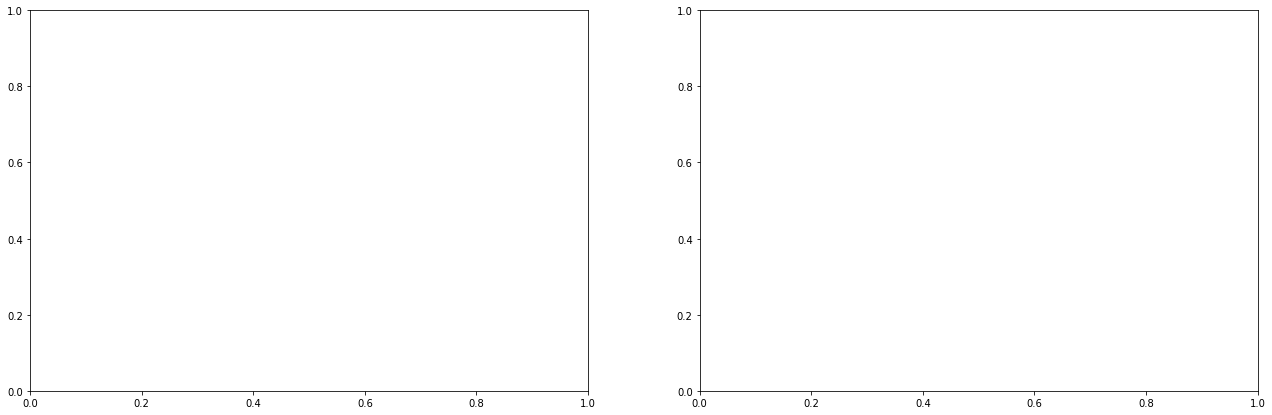

In [29]:

train_result = empty_train_result()
pp = PdfPages(r'hyper_para_testing\augmentation_data\final_model.pdf')
num = 1
with tf.device('/cpu:0'):

    X_train_input, y_train = shuffle(X_train_input, y_train)
tf.reset_default_graph()
dropprob = 0.5
rate = 0.035
ratedecay = 0.88
EPOCHS = 12
BATCH_SIZE = 512
regu_beta = 0
cons_soft = 0
incept = 1
batchnorm = 0
num = 1
#print('training process {:d}/2'.format(num))

train_acc,valid_acc,loss= train_model(num = num, batchnorm = batchnorm,incept = incept, cons_soft = cons_soft, print_info = 1, regu_beta = regu_beta, rate = rate, ratedecay = ratedecay, EPOCHS = EPOCHS, BATCH_SIZE = BATCH_SIZE,dropprob = dropprob,X_train_input = X_train_input,y_train = y_train)

train_result = train_result.append(pd.DataFrame(data = np.array([[dropprob,num,rate,ratedecay,regu_beta,cons_soft,EPOCHS,BATCH_SIZE,0,0,0,6,'LENET(augmentation adjust addition data,inception layer,batchnorm)',train_acc[-1],valid_acc[-1]]]),columns = train_result.columns ))
train_result.iloc[-1]['train_acc']=train_acc
train_result.iloc[-1]['valid_acc']=valid_acc
train_result.iloc[-1]['loss']=loss
title_1 = 'num = {}, accuracy with dropprob = {}'.format(num,dropprob)
title_2 = 'num = {}, loss with dropprob = {}'.format(num,dropprob)
fig = draw_acc(train_acc,valid_acc,loss, EPOCHS,title_1,title_2)
pp.savefig(fig)
plt.close(fig)

  
pp.close()
train_result.to_csv( r"hyper_para_testing\augmentation_data\final_model.csv",float_format = '%.4f', index = False)


## Final model training 2nd part. 
Since I doubt that the model performance can be improved futherly, I decided to train more epochs to get better final performance.<br>
What I do is that I load the model just trained on, and train some more EPOCHS, and let the model stop at training accuracy> 98.4% and validation accuracy > 98.3%. This end out using another 98 EPOCHs for the training.<br>
I this period, I set tighter learning rate and batch size 4096 for a better converging effect. <br>
The final model performance is shown in the following figure.

The final model is saved to '.\lenet_final'

In [14]:

tf.reset_default_graph()
cons_soft = 0
incept = 1
batchnorm = 0
dropprob = 0.5
rate = 0.003
ratedecay = 0.88
BATCH_SIZE = 4096
regu_beta = 0
cons_soft = 0
EPOCHS = 400
print_info = 1
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))

dropprob_holder = tf.placeholder(tf.float32,(None))
rate_holder = tf.placeholder(tf.float32,(None))
cons_soft_holder = tf.placeholder(tf.float32,(None))

one_hot_y = tf.one_hot(y, 43)
is_training = tf.placeholder(tf.bool, shape=())

tf.logging.set_verbosity(tf.logging.INFO)

logits,regularizers = LeNet(x,dropprob = dropprob_holder,batchnorm = batchnorm,is_training = is_training,cons_soft = cons_soft_holder,incept = incept)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)

regu_term = regularizers * regu_beta
loss_operation = tf.reduce_mean(cross_entropy + regu_term)
#optimizer = tf.train.AdamOptimizer(learning_rate = rate_holder)
optimizer = tf.train.MomentumOptimizer(rate_holder,0.9)
training_operation = optimizer.minimize(loss_operation)
# don't use dropout for test and valid set

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
def evaluate(X_data, y_data, rate):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={cons_soft_holder: 0, x: batch_x, y: batch_y,dropprob_holder: 1.0,is_training: False,rate_holder:rate})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
def evaluate_loss(X_data, y_data, rate):
    num_examples = len(X_data)
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss = sess.run(loss_operation, feed_dict={cons_soft_holder: 0, x: batch_x, y: batch_y,dropprob_holder: 1.0,is_training: False,rate_holder:rate})
        total_loss += (loss * len(batch_x))
    return total_loss / num_examples
with tf.Session() as sess:
    saver = tf.train.Saver()
    saver = tf.train.import_meta_graph('lenet_develop.meta')
    graph = tf.get_default_graph()
    saver.restore(sess, '.\lenet_develop')
    num_examples = len(X_train_input)

    print("Training...")

    train_accuracies = []
    train_accuracy =  0.98
    validation_accuracies = []
    validation_accuracy = 0.983
    loss_list = []
    starttime =  datetime.datetime.now()
    for i in range(EPOCHS):
        n_rate = rate
        if ratedecay != 0:
            #rate = rate/(ratedecay*EPOCHS+1)
            rate = rate*ratedecay
        if rate<0.0002:
            n_rate = 0.0002
        else:
            n_rate = rate
        if train_accuracy<0.97 and rate<0.01:
            n_rate = 0.01
        elif train_accuracy>0.97 and train_accuracy<0.98 and rate<0.004:
            n_rate = 0.005   
        elif train_accuracy>0.98 and train_accuracy<0.983 and rate<0.0015:
            n_rate = 0.004
        #elif train_accuracy>0.98 and train_accuracy<0.983 and rate<0.0015:
           # n_rate = 0.002
        elif train_accuracy>0.983 and train_accuracy<0.985 and rate<0.008:
            n_rate = 0.0015
        elif train_accuracy>0.985 and train_accuracy<0.987 and rate<0.0004:
            n_rate = 0.0008


        X_train_input, y_train = shuffle(X_train_input, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_input[offset:end], y_train[offset:end]
            sess.run(training_operation,feed_dict={cons_soft_holder: cons_soft, x: batch_x, y: batch_y,dropprob_holder: float(dropprob),is_training:True,rate_holder:n_rate})
        train_accuracy = evaluate(X_train_input, y_train,n_rate)    
        validation_accuracy = evaluate(X_valid_input, y_valid,n_rate)
        train_accuracies.append(train_accuracy)
        validation_accuracies.append(validation_accuracy)
        loss = evaluate_loss(X_train_input, y_train, n_rate)
        loss_list.append(loss)
        if  print_info == 1:
            print("Loss at EPOCH{} = {:.5f}".format(i+1, loss))
            print("Training Accuracy = {:.3f}".format(train_accuracy))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            currenttime =  datetime.datetime.now()
            timediff = (currenttime - starttime).seconds
            timeleft = float(EPOCHS - i -1)/float(i+1)*timediff
            print('estimate time left: {:.1f} seconds'.format(timeleft))
            print('current learning rate:{:.3f}'.format(n_rate))
        elif (i+1)%5 == 0:
            currenttime =  datetime.datetime.now()
            timediff = (currenttime - starttime).seconds
            timeleft = float(EPOCHS - i -1)/float(i+1)*timediff
            print('training process {}/EPOCHS'.format(i+1))
            print('estimate time left: {:.1f} seconds'.format(timeleft))
            print('current learning rate:{:.3f}'.format(n_rate))
        if train_accuracy>0.984 and validation_accuracy>0.983:
            break
    saver.save(sess, './lenet_final')
    print("Model saved")


INFO:tensorflow:Restoring parameters from .\lenet1
Training...
Loss at EPOCH1 = 0.05941
Training Accuracy = 0.982
Validation Accuracy = 0.982
estimate time left: 2793.0 seconds
current learning rate:0.003
Loss at EPOCH2 = 0.05858
Training Accuracy = 0.983
Validation Accuracy = 0.982
estimate time left: 2587.0 seconds
current learning rate:0.002
Loss at EPOCH3 = 0.05889
Training Accuracy = 0.983
Validation Accuracy = 0.981
estimate time left: 2382.0 seconds
current learning rate:0.002
Loss at EPOCH4 = 0.05824
Training Accuracy = 0.983
Validation Accuracy = 0.982
estimate time left: 2376.0 seconds
current learning rate:0.002
Loss at EPOCH5 = 0.05790
Training Accuracy = 0.983
Validation Accuracy = 0.982
estimate time left: 2370.0 seconds
current learning rate:0.002
Loss at EPOCH6 = 0.05789
Training Accuracy = 0.983
Validation Accuracy = 0.982
estimate time left: 2364.0 seconds
current learning rate:0.004
Loss at EPOCH7 = 0.05786
Training Accuracy = 0.983
Validation Accuracy = 0.982
estima

Loss at EPOCH58 = 0.05504
Training Accuracy = 0.984
Validation Accuracy = 0.982
estimate time left: 2057.9 seconds
current learning rate:0.002
Loss at EPOCH59 = 0.05508
Training Accuracy = 0.984
Validation Accuracy = 0.982
estimate time left: 2051.8 seconds
current learning rate:0.002
Loss at EPOCH60 = 0.05508
Training Accuracy = 0.984
Validation Accuracy = 0.983
estimate time left: 2051.3 seconds
current learning rate:0.002
Loss at EPOCH61 = 0.05493
Training Accuracy = 0.984
Validation Accuracy = 0.982
estimate time left: 2045.1 seconds
current learning rate:0.002
Loss at EPOCH62 = 0.05494
Training Accuracy = 0.984
Validation Accuracy = 0.983
estimate time left: 2038.9 seconds
current learning rate:0.002
Loss at EPOCH63 = 0.05490
Training Accuracy = 0.984
Validation Accuracy = 0.982
estimate time left: 2038.0 seconds
current learning rate:0.002
Loss at EPOCH64 = 0.05489
Training Accuracy = 0.984
Validation Accuracy = 0.982
estimate time left: 2031.8 seconds
current learning rate:0.002

**Now save the 2nd final model training process data into final_model_2.csv**

In [42]:
num =1 
train_result = empty_train_result()
train_result = train_result.append(pd.DataFrame(data = np.array([[dropprob,num,rate,ratedecay,regu_beta,cons_soft,EPOCHS,BATCH_SIZE,0,0,0,6,'LENET(augmentation adjust addition data,inception layer,batchnorm)',train_accuracies[-1],validation_accuracies[-1]]]),columns = train_result.columns ))
train_result.iloc[-1]['train_acc']=train_accuracies
train_result.iloc[-1]['valid_acc']=validation_accuracies
train_result.iloc[-1]['loss']=loss_list
train_result.to_csv( r"hyper_para_testing\augmentation_data\final_model_2.csv",float_format = '%.4f', index = False)


**now plot result from 1st and 2nd training process data together**

In [745]:
import ast
file_1 = pd.read_csv(r'hyper_para_testing\augmentation_data\final_model.csv')
file_2 = pd.read_csv(r'hyper_para_testing\augmentation_data\final_model_2.csv') 
train_acc = ast.literal_eval(file_1['train_acc'][0])+ast.literal_eval(file_2['train_acc'][0])
valid_acc = ast.literal_eval(file_1['valid_acc'][0])+ast.literal_eval(file_2['valid_acc'][0])
loss = ast.literal_eval(file_1['loss'][0])+ast.literal_eval(file_2['loss'][0])

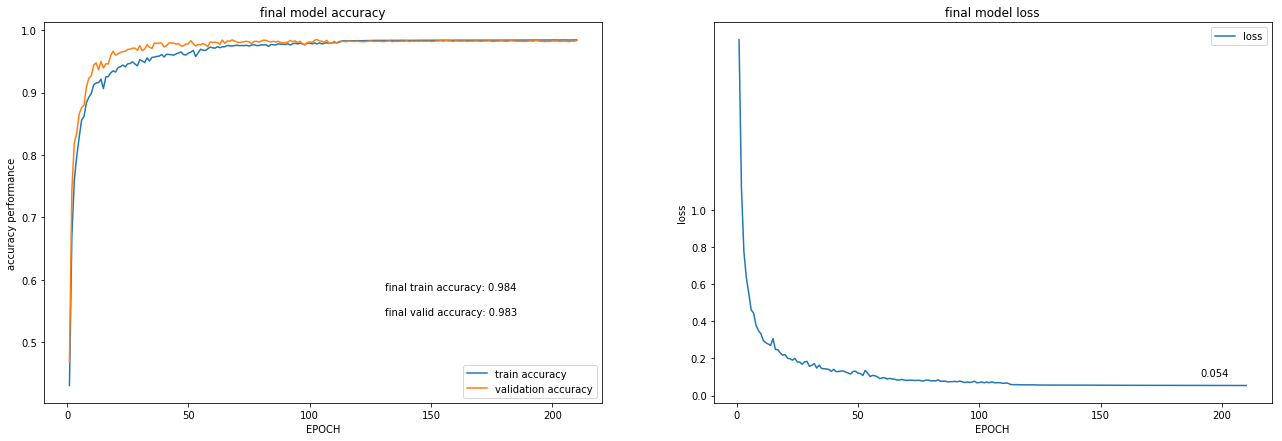

In [746]:
pp = PdfPages(r'hyper_para_testing\augmentation_data\final_model.pdf')
fig,ax = plt.subplots(1,2,figsize = [22,7])
x_values =range(1,210+1)
title_1 = 'final model accuracy'
title_2 = 'final model loss'
ax[0].plot(x_values, train_acc,label = 'train accuracy' )
ax[0].plot(x_values, valid_acc,label = 'validation accuracy')

ax[0].text(x_values[130],train_acc[-1]-0.4,'final train accuracy: '+str(round(train_acc[-1],3)))
ax[0].text(x_values[130],valid_acc[-1]-0.44,'final valid accuracy: '+str(round(valid_acc[-1],3)))
ax[0].set_xlabel('EPOCH')
ax[0].set_yticks(np.arange(0.5,1.01,0.1))
ax[0].set_ylabel('accuracy performance')
ax[0].set_title(title_1)
ax[0].legend() 

ax[1].plot(x_values, loss,label = 'loss' )

ax[1].text(x_values[-20],loss[-1] + 0.05,str(round(loss[-1],3)))
ax[1].set_yticks(np.arange(0.0,1.05,0.2))
ax[1].set_xlabel('EPOCH')
ax[1].set_ylabel('loss')
ax[1].set_title(title_2)
ax[1].legend()
fig.savefig(r'report_images\final_model.jpg')

In [52]:
pp.savefig(fig)
plt.close(fig)
pp.close()


# 3.4  evaluation of the test set
As shown in the below section, our model accuracy on the test set is 95.7%.
Futher improvement can be made by:
- adding more validation set, training set
- improve model achitecture
- better tuning hyperparameters
- better training process

More of the model performance evaluation will be in the next section

In [502]:
one_hot_y

<tf.Tensor 'one_hot:0' shape=<unknown> dtype=float32>

In [14]:
def evaluate(X_data, y_data, rate):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={cons_soft_holder: 0, x: batch_x, y: batch_y,dropprob_holder: 1.0,is_training: False,rate_holder:rate})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
def calculated_logits(X_data, y_data):
    rate = 0.003
    num_examples = len(X_data)
    sess = tf.get_default_session()
    logits_data  = sess.run(logits, feed_dict={cons_soft_holder: 0, x: X_data, y: y_data,dropprob_holder: 1.0,is_training: False,rate_holder:rate})
    one_hot_y_data = sess.run(one_hot_y, feed_dict={cons_soft_holder: 0, x: X_data, y:y_data,dropprob_holder: 1.0,is_training: False,rate_holder:rate})
    return logits_data,one_hot_y_data

    

In [19]:
batchnorm = 0
incept = 1
regu_beta= 0
BATCH_SIZE = 1024
tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))

dropprob_holder = tf.placeholder(tf.float32,(None))
rate_holder = tf.placeholder(tf.float32,(None))
cons_soft_holder = tf.placeholder(tf.float32,(None))

one_hot_y = tf.one_hot(y, 43)
is_training = tf.placeholder(tf.bool, shape=())

tf.logging.set_verbosity(tf.logging.INFO)

logits,regularizers = LeNet(x,dropprob = dropprob_holder,batchnorm = batchnorm,is_training = is_training,cons_soft = cons_soft_holder,incept = incept)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)

regu_term = regularizers * regu_beta
loss_operation = tf.reduce_mean(cross_entropy + regu_term)
#optimizer = tf.train.AdamOptimizer(learning_rate = rate_holder)
optimizer = tf.train.MomentumOptimizer(rate_holder,0.9)
training_operation = optimizer.minimize(loss_operation)
# don't use dropout for test and valid set

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, '.\lenet_final')

    test_accuracy = evaluate(X_test_input, y_test,0.003)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\lenet_final
Test Accuracy = 0.957


### Now calculating precision and recall for test set

In [505]:
with tf.Session() as sess:
    saver.restore(sess, '.\lenet_final')
    logits_data,one_hot_y_data = calculated_logits(X_test_input, y_test)

INFO:tensorflow:Restoring parameters from .\lenet_final


In [645]:
def calculate_recall(logits_data,one_hot_y_data):
    recall_list = []
    True_pos_list  = []
    for num in range(logits_data.shape[1]):
        lable_index = np.array(np.where(y_test == num)).squeeze()
        label_predict_values = np.argmax(logits_data[lable_index],axis = 1)
        True_pos = len(label_predict_values[label_predict_values == num])
        False_neg = len(label_predict_values[label_predict_values != num])
        recall = float(True_pos)/float(True_pos+False_neg)
        recall_list.append(recall)
        True_pos_list.append(True_pos)
    return recall_list,True_pos_list
def calculate_precision(logits_data,one_hot_y_data,True_pos_list):
    precision_list = []
    data_predict_values = np.argmax(logits_data,axis = 1)
    for num in range(logits_data.shape[1]):
        True_pos = True_pos_list[num]
        current_data_predict_value = len(np.array(np.where(predictions == num)).squeeze())
        precision = float(True_pos)/float(current_data_predict_value)
        precision_list.append(precision)
    return precision_list

In [646]:
recall_list,True_pos_list = calculate_recall(logits_data,one_hot_y_data)
precision_list = calculate_precision(logits_data,one_hot_y_data,True_pos_list)
for num in range(0,43):
    print('label{}  recall:{:.4f} precision:{:.4f}'.format(num,recall_list[num],precision_list[num]))

label0  recall:0.8833 precision:0.8983
label1  recall:0.9875 precision:0.9556
label2  recall:0.9733 precision:0.9505
label3  recall:0.9044 precision:0.9532
label4  recall:0.9652 precision:0.9830
label5  recall:0.9413 precision:0.9095
label6  recall:0.9400 precision:0.9463
label7  recall:0.9222 precision:0.9857
label8  recall:0.9911 precision:0.9272
label9  recall:1.0000 precision:0.9677
label10  recall:0.9894 precision:0.9969
label11  recall:0.9357 precision:0.9269
label12  recall:0.9870 precision:0.9913
label13  recall:0.9944 precision:0.9958
label14  recall:1.0000 precision:0.8882
label15  recall:0.9905 precision:0.9952
label16  recall:1.0000 precision:1.0000
label17  recall:0.9361 precision:0.9825
label18  recall:0.8641 precision:0.9656
label19  recall:0.9667 precision:0.9831
label20  recall:1.0000 precision:0.9574
label21  recall:0.7222 precision:0.8904
label22  recall:0.9000 precision:1.0000
label23  recall:0.9933 precision:0.8514
label24  recall:0.8778 precision:0.8681
label25  r

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

### Crop images to rectangular shape
Some images are not rectangular. So I manually crop each image to rectangular

In [265]:
import cv2
from PIL import Image
testimg = plt.imread(r"test_images\test8.jpg")


In [266]:
np.shape(testimg)

(286, 176, 3)

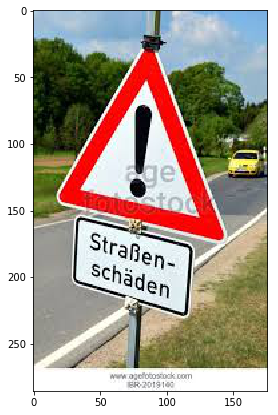

In [267]:
fig,ax = plt.subplots(1,1,figsize = [7,7])
ax.imshow(testimg)

Crop images according to their shapes

In [274]:
testimgnew = testimg[20:20+176,:,:]

In [275]:
testimgnew.shape

(176, 176, 3)

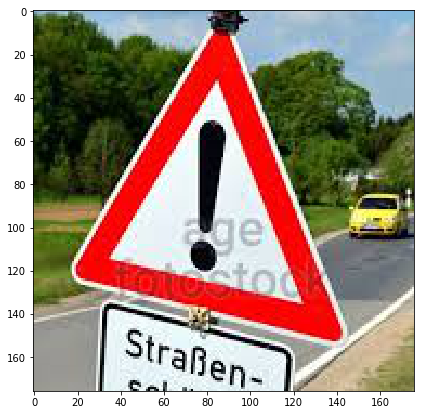

In [276]:
fig,ax = plt.subplots(1,1,figsize = [7,7])
ax.imshow(testimgnew)


In [277]:
fig.savefig(r'test_images\test8.jpg')

### set new images resolution to 32x32 and save to pickle file

In [45]:
def jpg_image_to_array(image):
        
    im_arr = np.fromstring(image.tobytes(), dtype=np.uint8)
    im_arr = im_arr.reshape((image.size[1], image.size[0], 3))                                   
    return im_arr

In [46]:
from PIL import Image
basewidth = 32
X_test_new = []
for num in range(1,9):
    img = Image.open(r'test_images\test{}.jpg'.format(num))
    wpercent = (basewidth / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    img = img.resize((basewidth, hsize), Image.ANTIALIAS)
    imgarray = jpg_image_to_array(img)
    X_test_new.append(imgarray)

In [47]:
X_test_new = np.array(X_test_new)
X_test_new.shape

(8, 32, 32, 3)

Manuallu label the pictures

In [48]:
y_test_new = np.array([1,27,40,11,25,38,17,18])
y_test_new.shape

(8,)

Save to local pickle file

In [50]:
test_new = {}
test_new['features'], test_new['labels'] = X_test_new, y_test_new

with open('test_new.p', 'wb') as handle:
    pickle.dump(test_new, handle, protocol=pickle.HIGHEST_PROTOCOL)

Check test new images shape

In [51]:
X_test_new[0].shape

(32, 32, 3)

### Preprocess the images to grayscale and normalized

In [59]:
X_test_new_gray = grayscale(X_test_new)
X_test_new_norm = normalize(X_test_new_gray)
X_test_new_input = changedim(X_test_new_norm)
X_test_new_input.shape

(8, 32, 32, 1)

### visualize all the test_new images

In [28]:
signnames = pd.read_csv('signnames.csv')
signnames.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


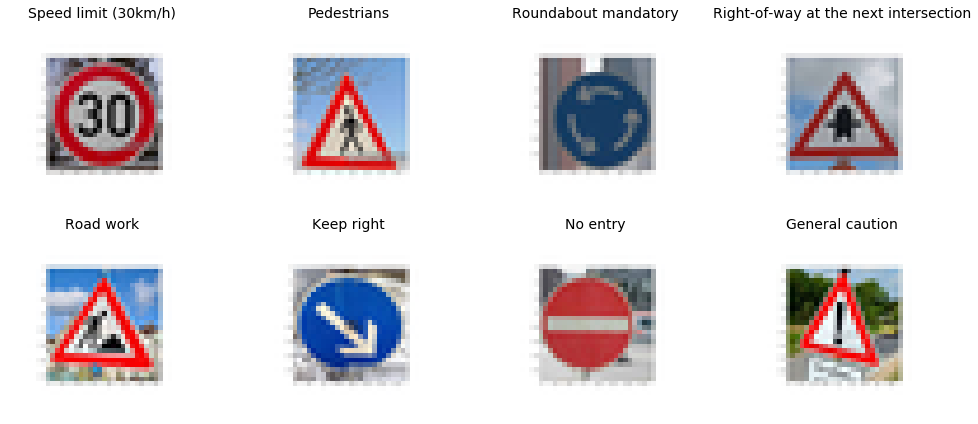

In [388]:
fig,ax = plt.subplots(2,4,figsize = [14,6])
for num in range(0,4):
    ax[0][num].imshow(X_test_new[num])
    ax[0][num].axis('off')
    ax[0][num].set_title('{}\n'.format(signnames['SignName'][y_test_new[num]]),fontsize=14)
    ax[1][num].imshow(X_test_new[4+num])
    ax[1][num].axis('off')
    ax[1][num].set_title('{}\n'.format(signnames['SignName'][y_test_new[4+num]]),fontsize=14)
fig.tight_layout()
fig.savefig(r'report_images\web_test_images')

### Predict the Sign Type for Each Image

### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

**Define prediction function**

In [346]:
def predict(X_data, y_data):
    rate = 0.003
    sess = tf.get_default_session()
    predict_operation = tf.argmax(logits, 1)
    num_example = len(y_data)
    prediction = sess.run(predict_operation, feed_dict={cons_soft_holder: 0, x: X_data, y: y_data,dropprob_holder: 1.0,is_training: False,rate_holder:rate})
    return  prediction

**predict output for images, and compare to labels**

In [676]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))

dropprob_holder = tf.placeholder(tf.float32,(None))
rate_holder = tf.placeholder(tf.float32,(None))
cons_soft_holder = tf.placeholder(tf.float32,(None))

one_hot_y = tf.one_hot(y, 43)
is_training = tf.placeholder(tf.bool, shape=())

tf.logging.set_verbosity(tf.logging.INFO)

logits,regularizers = LeNet(x,dropprob = dropprob_holder,batchnorm = batchnorm,is_training = is_training,cons_soft = cons_soft_holder,incept = incept)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)

regu_term = regularizers * regu_beta
loss_operation = tf.reduce_mean(cross_entropy + regu_term)
#optimizer = tf.train.AdamOptimizer(learning_rate = rate_holder)
optimizer = tf.train.MomentumOptimizer(rate_holder,0.9)
training_operation = optimizer.minimize(loss_operation)
# don't use dropout for test and valid set

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, '.\lenet_final')

    predict_values = predict(X_test_new_input, y_test_new)
    for num in range(1,9):
        print('label value for test{}.jpg: {}, predict value for test{}.jpg: {}\n'.format(num,y_test_new[num-1],num,predict_values[num-1]))
   # print("web images Test Accuracy = {:.3f}".format(test_new_accuracy))

INFO:tensorflow:Restoring parameters from .\lenet_final
label value for test1.jpg: 1, predict value for test1.jpg: 1

label value for test2.jpg: 27, predict value for test2.jpg: 27

label value for test3.jpg: 40, predict value for test3.jpg: 40

label value for test4.jpg: 11, predict value for test4.jpg: 11

label value for test5.jpg: 25, predict value for test5.jpg: 25

label value for test6.jpg: 38, predict value for test6.jpg: 38

label value for test7.jpg: 17, predict value for test7.jpg: 17

label value for test8.jpg: 18, predict value for test8.jpg: 18



### Analyze Performance
As you can see, for 8 web images, our model accuracy is 100%.Cool! Awesome!<br>
the images I choose is not hard for model (and for human beings) to classify.  I guess it will be hard if I pick some images that are harder to classify.

In [353]:
with tf.Session() as sess:
    saver.restore(sess, '.\lenet_final')  
    test_new_accuracy = evaluate(X_test_new_input, y_test_new,0.003)
    print("web images Test Accuracy = {:.3f}%".format(test_new_accuracy*100))

INFO:tensorflow:Restoring parameters from .\lenet_final
web images Test Accuracy = 100.000%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

In [52]:
# Load pickled data
import pickle

testing_file = 'test_new.p'
with tf.device('/cpu:0'):
    with open(testing_file, mode='rb') as f:
        test_new = pickle.load(f)

    X_test_new, y_test_new = test_new['features'], test_new['labels']

In [58]:
X_test_new.shape

(8, 32, 32, 3)

In [70]:
def top_prob(X_data,y_data):
    topprob_operation = tf.nn.top_k(tf.nn.softmax(logits,dim = 1),k=5)
    rate = 0.001
    topprobs= sess.run(topprob_operation, feed_dict={cons_soft_holder: 0, x: X_data, y: y_data,dropprob_holder: 1.0,is_training: False,rate_holder:rate})
    return topprobs

In [72]:
with tf.Session() as sess:
    saver.restore(sess, '.\lenet_final')

    topprobs = top_prob(X_test_new_input, y_test_new)
    for num in range(0,8):
        print('top 5 Softmax Probabilities for test{}.jpg:'.format(num+1))
        print('probabilities:{:.3f}%| {:.3f}%| {:.3f}%| {:.3f}%| {:.3f}%\n'.format(topprobs[0][num][0]*100,topprobs[0][num][1]*100,topprobs[0][num][2]*100,topprobs[0][num][3]*100,topprobs[0][num][4]*100))
        labels = topprobs[1][num]
        print('predict label: {:2d}    |  {:2d}    |  {:2d}    |  {:2d}    |  {:2d}    \n'.format(labels[0],labels[1],labels[2],labels[3],labels[4]))
        print('Top probability is label {}, which is predicted as:{}'.format(labels[0],signnames['SignName'][labels[0]] ))
        print('--'*40)

INFO:tensorflow:Restoring parameters from .\lenet_final
top 5 Softmax Probabilities for test1.jpg:
probabilities:100.000%| 0.000%| 0.000%| 0.000%| 0.000%

predict label:  1    |   0    |   2    |   4    |   3    

Top probability is label 1, which is predicted as:Speed limit (30km/h)
--------------------------------------------------------------------------------
top 5 Softmax Probabilities for test2.jpg:
probabilities:100.000%| 0.000%| 0.000%| 0.000%| 0.000%

predict label: 27    |  11    |  30    |  25    |  21    

Top probability is label 27, which is predicted as:Pedestrians
--------------------------------------------------------------------------------
top 5 Softmax Probabilities for test3.jpg:
probabilities:89.835%| 7.610%| 2.554%| 0.000%| 0.000%

predict label: 40    |   7    |  12    |   1    |  39    

Top probability is label 40, which is predicted as:Roundabout mandatory
--------------------------------------------------------------------------------
top 5 Softmax Probabil

It seems that model is very certain about all the images..
For image3:

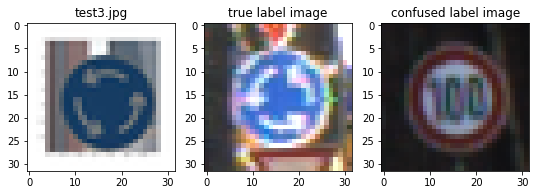

In [489]:
fig,ax = plt.subplots(1,3,figsize = [9,3])
condition  = (np.average(X_train,axis = (1,2,3) )>50)&((np.average(X_train,axis = (1,2,3) )<150))
index_array = np.array(np.where(y_train[condition] == 40))
np.random.shuffle(index_array)  
index = index_array.squeeze()[0]
image_1 = X_train[condition][index].squeeze()
index_array = np.array(np.where(y_train[condition] == 7))
np.random.shuffle(index_array)  
index = index_array.squeeze()[0]
image_2 = X_train[condition][index].squeeze()
ax[0].imshow(X_test_new[2])
ax[0].set_title('test3.jpg')
ax[1].imshow(image_1)
ax[1].set_title('true label image')
ax[2].imshow(image_2)
ax[2].set_title('confused label image')
fig.savefig(r'report_images\confused_image_1.jpg')


** For test8.jpg:**

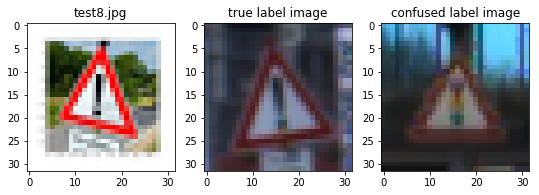

In [490]:
fig,ax = plt.subplots(1,3,figsize = [9,3])
condition  = (np.average(X_train,axis = (1,2,3) )>50)&((np.average(X_train,axis = (1,2,3) )<150))
index_array = np.array(np.where(y_train[condition] == 18))
np.random.shuffle(index_array)  
index = index_array.squeeze()[0]
image_1 = X_train[condition][index].squeeze()
index_array = np.array(np.where(y_train[condition] == 26))
np.random.shuffle(index_array)  
index = index_array.squeeze()[0]
image_2 = X_train[condition][index].squeeze()
ax[0].imshow(X_test_new[7])
ax[0].set_title('test8.jpg')
ax[1].imshow(image_1)
ax[1].set_title('true label image')
ax[2].imshow(image_2)
ax[2].set_title('confused label image')
fig.savefig(r'report_images\confused_image_2.jpg')

The confused labe image looks similar to the true lable image

## Compare the performance on the new images to the accuracy results of the test set.
For the test set we have 95.7% accuracy, while for new images we have 100% accuracy.<br>
Well this comparison is actually not fare because we have too little amount of images for the new images.<br>
I think if I increase the number of new images, the comparison will make more sense.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [732]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    fig = plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
    return fig

In [707]:
np.array([y_test_new[0]])

array([1])

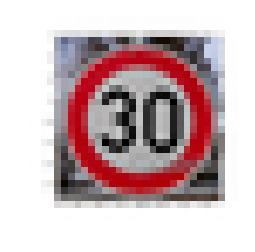

In [695]:
testimg = np.array([X_test_new[0]])
plt.imshow(testimg[0])
plt.axis('off')
plt.savefig(r'report_images\Visualize_raw')

In [723]:
len(y_train)

208794

INFO:tensorflow:Restoring parameters from .\lenet_final


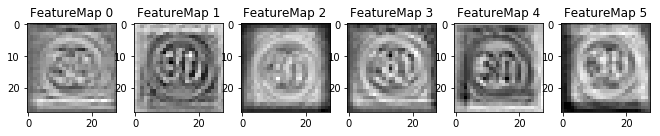

In [739]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))

dropprob_holder = tf.placeholder(tf.float32,(None))
rate_holder = tf.placeholder(tf.float32,(None))
cons_soft_holder = tf.placeholder(tf.float32,(None))

one_hot_y = tf.one_hot(y, 43)
is_training = tf.placeholder(tf.bool, shape=())

tf.logging.set_verbosity(tf.logging.INFO)
batchnorm = 0
cons_soft = 0
incept = 1
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1

# Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
conv1_w = tf.Variable(tf.truncated_normal(shape = (5,5,1,6),mean = mu, stddev=sigma))
conv1_b = tf.Variable(tf.zeros(6))
conv1 = tf.add(tf.nn.conv2d(x,conv1_w,strides = [1,1,1,1],padding = 'VALID'),conv1_b)

if batchnorm ==1:
    conv1  = batch_norm(conv1, 6, is_training)
#  Activation.
conv1_act = tf.nn.relu(conv1)

#  Pooling. Input = 28x28x6. Output = 14x14x6.
conv1_pool = tf.nn.max_pool(conv1_act,ksize=(1,2,2,1),strides= (1,2,2,1),padding = 'VALID')



#  Layer 2: Convolutional. Output = 10x10x16.
conv2_w = tf.Variable(tf.truncated_normal(shape = (5,5,6,16),mean = mu, stddev=sigma))
conv2_b = tf.Variable(tf.zeros(16))
conv2 = tf.add(tf.nn.conv2d(conv1_pool,conv2_w,strides = [1,1,1,1],padding = 'VALID'),conv2_b)

if batchnorm ==1:
    conv2  = batch_norm(conv2, 16, is_training)
#  Activation.
conv2_act = tf.nn.relu(conv2)


# Pooling. Input = 10x10x16. Output = 5x5x16.
conv2_pool = tf.nn.max_pool(conv2_act,ksize=(1,2,2,1),strides= (1,2,2,1),padding = 'VALID')


if incept == 1:
    #inception
    conv2_pool,output_channel = inception2d(conv2_pool, 16, 5,mu,sigma)
    fc0 = flatten(conv2_pool)

    fc1_w = tf.Variable(tf.truncated_normal(shape = (output_channel*5*5,120),mean = mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.add(tf.matmul(fc0,fc1_w),fc1_b)

if incept != 1:
    #  Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2_pool)
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_w = tf.Variable(tf.truncated_normal(shape = (400,120),mean = mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.add(tf.matmul(fc0,fc1_w),fc1_b)

if batchnorm ==1:
    fc1 = batch_norm(fc1, 120, is_training)  

#  Activation.
fc1_act = tf.nn.relu(fc1)


# Dropout
fc1_act = tf.nn.dropout(fc1_act,keep_prob= dropprob)


# Layer 4: Fully Connected. Input = 120. Output = 84.
fc2_w = tf.Variable(tf.truncated_normal(shape = (120,84),mean = mu, stddev=sigma))
fc2_b = tf.Variable(tf.zeros(84))
fc2 = tf.add(tf.matmul(fc1_act,fc2_w),fc2_b)

if batchnorm ==1:
    fc2  = batch_norm(fc2, 84, is_training)
# Activation.
fc2_act = tf.nn.relu(fc2)


# Dropout

fc2_act = tf.nn.dropout(fc2_act, keep_prob= dropprob)


# Layer 5: Fully Connected. Input = 84. Output = 10.
fc3_w = tf.Variable(tf.truncated_normal(shape = (84,43),mean = mu, stddev=sigma))
fc3_b = tf.Variable(tf.zeros(43))
logits = tf.add(tf.matmul(fc2_act,fc3_w),fc3_b)
regularizers = tf.nn.l2_loss(conv1_w)
for weights in [conv2_w,fc1_w,fc2_w,fc3_w]:
    regularizers += tf.nn.l2_loss(weights)
    
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)

regu_term = regularizers * regu_beta
loss_operation = tf.reduce_mean(cross_entropy + regu_term)
#optimizer = tf.train.AdamOptimizer(learning_rate = rate_holder)
optimizer = tf.train.MomentumOptimizer(rate_holder,0.9)
training_operation = optimizer.minimize(loss_operation)
# don't use dropout for test and valid set

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#tf_activation_1=conv1_pool
#conv1
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, '.\lenet_final')
    sess.run(tf.global_variables_initializer())
    sess.run(conv1,feed_dict={cons_soft_holder: 0, x: X_test_new_input, y: 1,dropprob_holder: 1.0,is_training: False,rate_holder:0.01})

    fig_conv1 = outputFeatureMap( X_test_new_input,conv1)
    fig_conv1.savefig(r'report_images\conv1')

INFO:tensorflow:Restoring parameters from .\lenet_final


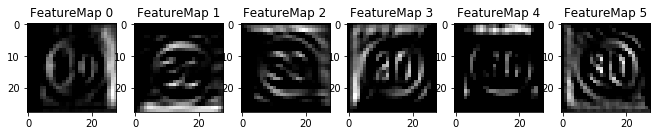

In [740]:
with tf.Session() as sess:
    saver.restore(sess, '.\lenet_final')
    sess.run(conv1_act,feed_dict={cons_soft_holder: 0, x: X_test_new_input, y: 1,dropprob_holder: 1.0,is_training: False,rate_holder:0.01})

    fig_conv1_act = outputFeatureMap( X_test_new_input,conv1_act)
    fig_conv1_act.savefig(r'report_images\conv1_act')

INFO:tensorflow:Restoring parameters from .\lenet_final


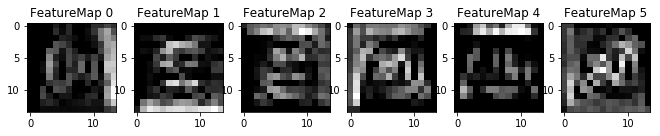

In [741]:
with tf.Session() as sess:
    saver.restore(sess, '.\lenet_final')
    sess.run(conv1_pool,feed_dict={cons_soft_holder: 0, x: X_test_new_input, y: 1,dropprob_holder: 1.0,is_training: False,rate_holder:0.01})

    fig_conv1_pool = outputFeatureMap( X_test_new_input,conv1_pool)
    fig_conv1_pool.savefig(r'report_images\conv1_act_pool')

INFO:tensorflow:Restoring parameters from .\lenet_final


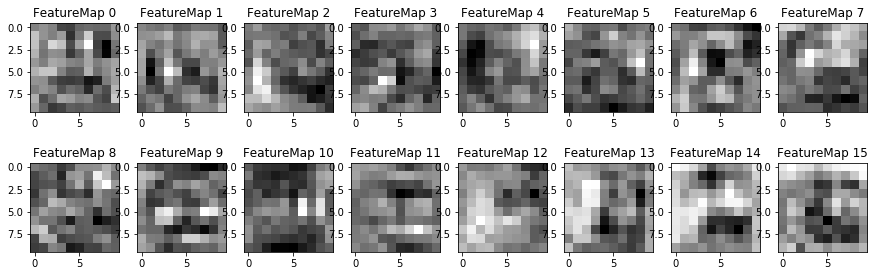

In [742]:
with tf.Session() as sess:
    saver.restore(sess, '.\lenet_final')
    sess.run(conv2,feed_dict={cons_soft_holder: 0, x: X_test_new_input, y: 1,dropprob_holder: 1.0,is_training: False,rate_holder:0.01})

    fig_conv2 = outputFeatureMap( X_test_new_input,conv2)
    fig_conv2.savefig(r'report_images\conv2')

INFO:tensorflow:Restoring parameters from .\lenet_final


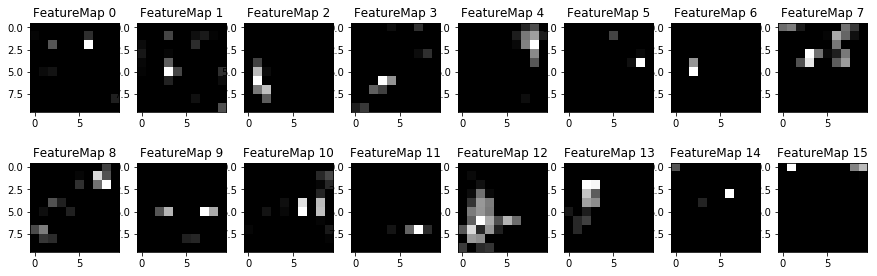

In [743]:
with tf.Session() as sess:
    saver.restore(sess, '.\lenet_final')
    sess.run(conv2_act,feed_dict={cons_soft_holder: 0, x: X_test_new_input, y: 1,dropprob_holder: 1.0,is_training: False,rate_holder:0.01})

    fig_conv2_act = outputFeatureMap( X_test_new_input,conv2_act)
    fig_conv2_act.savefig(r'report_images\conv2_act')

INFO:tensorflow:Restoring parameters from .\lenet_final


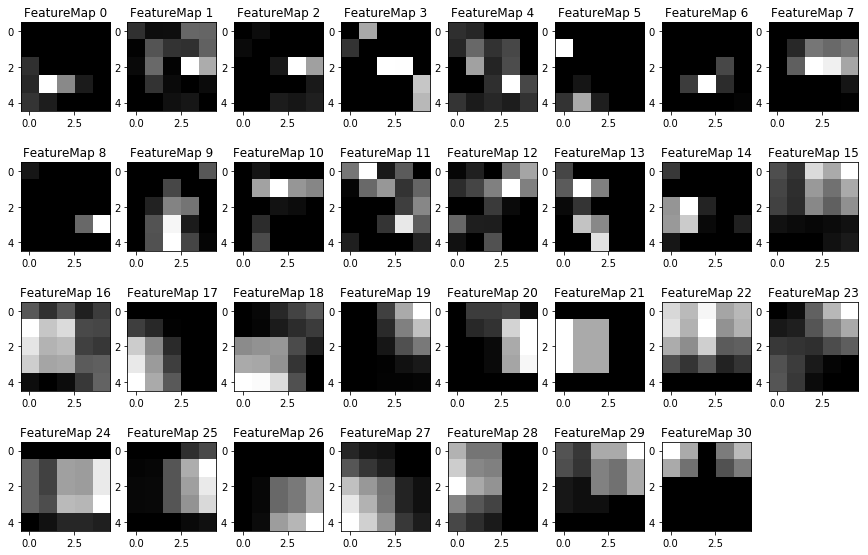

In [744]:
with tf.Session() as sess:
    saver.restore(sess, '.\lenet_final')
    sess.run(conv2_pool,feed_dict={cons_soft_holder: 0, x: X_test_new_input, y: 1,dropprob_holder: 1.0,is_training: False,rate_holder:0.01})

    fig_conv2_pool = outputFeatureMap( X_test_new_input,conv2_pool)
    fig_conv2_pool.savefig(r'report_images\inception_visual')